## Hugging Face Transformer Models

`Hugging Face` is another deep-learning library that contains state-of-the-art (SOTA) _transformer_ models, data loaders and other tools for various audio, text, and computer vision tasks.

Install Hugging Face transformers via pip: `pip install transformers`


In [1]:
import transformers

Both an advantage and a disadvantage, `Hugging Face` offers multiple levels of abstractions that a user may opt to use for ease of access or improved quality of life. On the developer side of things, however, this may come out as confusing at first and offers little flexibility.

### Using Hugging Face pipeline() on Image Classification

One clear example that showcases Hugging Face's powerful abstraction is the `pipeline()` function. It simplifies the end-to-end task by hiding the complex codes and simply asking for necessary inputs and information in order to fully function.

In running `pipeline`, you might need to install the ff packages first via pip: `pip install ipywidgets widgetsnbextension` 

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
from transformers import pipeline

pipe = pipeline('image-classification', model='facebook/deit-tiny-distilled-patch16-224')

We load our sample image.

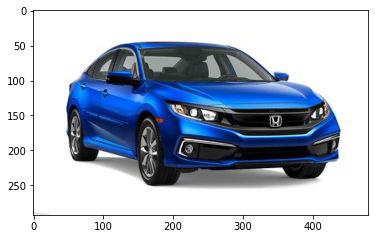

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('resources/car.jpg')
plt.imshow(image)
plt.show()

With `pipeline`, the long code we had with timm gets simplified by simply calling `pipe` with our image. We may also vary _k_ for topk results by modifying the `top_k` argument.

There is _no need_ to resize images given data pre-processing is also already included in the pipe.

In [5]:
pipe(image, top_k=3)

[{'score': 0.8284488320350647, 'label': 'sports car, sport car'},
 {'score': 0.09034775197505951, 'label': 'convertible'},
 {'score': 0.025095796212553978, 'label': 'pickup, pickup truck'}]

### Hugging Face on Image Classification

In [6]:
from transformers import AutoFeatureExtractor, DeiTForImageClassificationWithTeacher

feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/deit-tiny-distilled-patch16-224')
model = DeiTForImageClassificationWithTeacher.from_pretrained('facebook/deit-tiny-distilled-patch16-224')

Given our feature extractor and classifier models, we perform prediction on our sample image.

In [7]:
input = feature_extractor(images=image, return_tensors='pt')
output = model(**input)
logits = output.logits

pred_class = logits.argmax(-1).item()
print("Predicted class label {}: {}".format(pred_class, model.config.id2label[pred_class]))

Predicted class label 817: sports car, sport car


### Using Hugging Face pipeline() on Audio Recognition

Hugging Face isn't limited only to image, but also incorporates tasks from other modalities such as text and audio. In this section, we further appreciate Hugging Face's abstraction capabilities via the `pipeline` function but on audio recognition.

For other pipeline tasks, please refer to <a href="https://huggingface.co/docs/transformers/master/en/main_classes/pipelines">this documentation</a>.

In [8]:
pipe = pipeline('audio-classification') # Default model: superb/wav2vec2-base-superb-ks

No model was supplied, defaulted to superb/wav2vec2-base-superb-ks (https://huggingface.co/superb/wav2vec2-base-superb-ks)
/home/izza/anaconda2/envs/dl_course/lib/python3.9/site-packages/transformers/configuration_utils.py:353: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


We generate our data by calling `sounddevice` to record real-time audio.

Note: Install sounddevice via `pip install sounddevice`

In [9]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 16000
dur = 2

audio = sd.rec(int(dur*fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()

In [10]:
import IPython

audio = audio.reshape((1,-1))
IPython.display.Audio(audio, rate=fs)

Given our recorded audio, we get the results by calling `pipe`.

In [11]:
pipe(audio.squeeze(), top_k=3)

[{'score': 0.978605329990387, 'label': 'up'},
 {'score': 0.013355528004467487, 'label': 'stop'},
 {'score': 0.005708349868655205, 'label': 'off'}]

### Using Hugging Face pipeline() on Text Inputs

In this section, we perform inferencing on a text-based task via Hugging Face's `pipeline` function.

In [12]:
pipe = pipeline('fill-mask', model='jcblaise/roberta-tagalog-small')

Fill-mask is a sentence completion task, where the model tries to predict a word on each masked region in order to complete the sentence. Currently, Hugging Face fill-mask pipeline only works for single masked token.

In [13]:
pipe('ikaw ang <mask> ko', top_k=3)

[{'score': 0.04479367658495903,
  'token': 1115,
  'token_str': ' pangalan',
  'sequence': 'ikaw ang pangalan ko'},
 {'score': 0.036456041038036346,
  'token': 1186,
  'token_str': ' Diyos',
  'sequence': 'ikaw ang Diyos ko'},
 {'score': 0.010230079293251038,
  'token': 1593,
  'token_str': ' ama',
  'sequence': 'ikaw ang ama ko'}]

For more information regarding Hugging Face transformers, please visit their <a href="https://github.com/huggingface/transformers">Github page</a> 